In [2]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

def load_image_test(datapoint):
    input_image = tf.image.resize(datapoint['image'], (128, 128))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (128, 128))

    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

# 读取数据

In [3]:

sigmod0_npy_dir = train_dir + r'\\sigmod0\\npy\\'
aari_npy_dir = train_dir + r'\\mask\\aari\\npy\\'
aari_normail_npy_dir = train_dir + r'\\mask\\aari\\npy\\normail_npy\\'
osisaf_npy_dir = train_dir + r'\\mask\\osisaf\\npy\\'


In [4]:
sigmod0_npy_files = glob.glob(sigmod0_npy_dir + '*.npy')
aari_npy_files = glob.glob(aari_npy_dir + r'*.npy')
osisaf_npy_files = glob.glob(osisaf_npy_dir + r'*.npy')

osi_array = np.load(osisaf_npy_files[0])
aari_array = np.load(aari_npy_files[0])

new_osi_array = np.full(shape=osi_array.shape[:2], fill_value=0)
new_aari_array = np.full(shape=osi_array.shape[:2], fill_value=0)


look = np.full(shape=osi_array.shape[:2], fill_value=0)

for i in range(3):
    new_osi_array += osi_array[:,:,i]
    
for i in range(3):
    new_aari_array += aari_array[:,:,i]
    

In [255]:
new_osi_array = np.full(shape=osi_array.shape[:2], fill_value=0)
new_aari_array = np.full(shape=osi_array.shape[:2], fill_value=0)


look = np.full(shape=osi_array.shape[:2], fill_value=0)

In [256]:
for i in range(3):
    new_osi_array += osi_array[:,:,i]
    
for i in range(3):
    new_aari_array += aari_array[:,:,i]
    

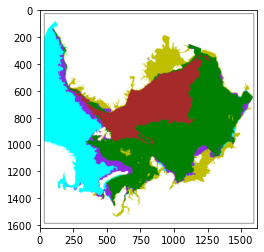

In [268]:
plt.imshow(np.load(aari_npy_files[0]))

In [312]:

for aari_npy_file, sigmod0_npy_file in zip(aari_npy_files, sigmod0_npy_files):
    aari_array = np.load(aari_npy_file)
    sigmod0_array = np.load(sigmod0_npy_file)
    new_aari_array = np.full(shape=aari_array.shape[:2], fill_value=0)
    for i in range(3):
        new_aari_array += aari_array[:,:,i]
    new_aari_array[new_aari_array == 765] = 1
    new_aari_array[new_aari_array == 128] = 2
    new_aari_array[new_aari_array == 510] = 3
    new_aari_array[new_aari_array == 249] = 4
    new_aari_array[new_aari_array == 382] = 5
    new_aari_array[new_aari_array == 407] = 6
    
    np.save(aari_npy_dir + r'\\normail_npy\\' + sigmod0_npy_file.split('\\')[-1],new_aari_array)
    
        

large_num_index = np.argsort(plt.hist(new_aari_array.flatten(),bins=765)[0])[-10:]
plt.hist(new_aari_array.flatten(),bins=765)[1][large_num_index]

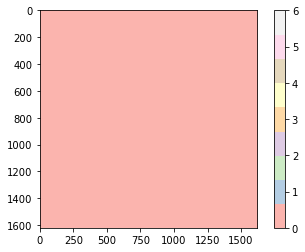

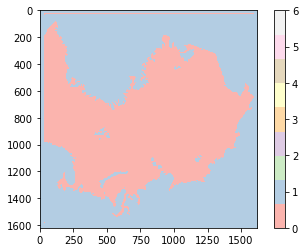

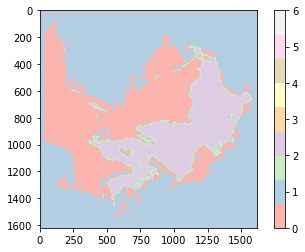

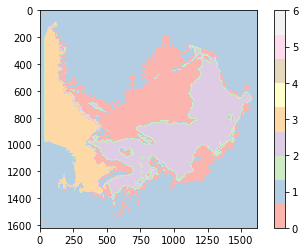

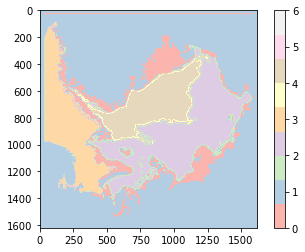

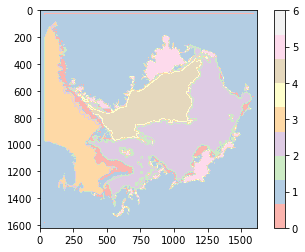

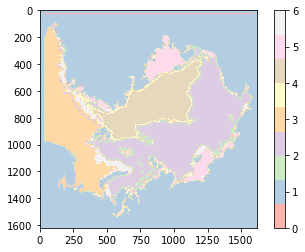

In [257]:
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

 
look[new_aari_array == 765] = 1 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 128] = 2 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 510] = 3 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 249] = 4 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 382] = 5
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_aari_array == 407] = 6
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()


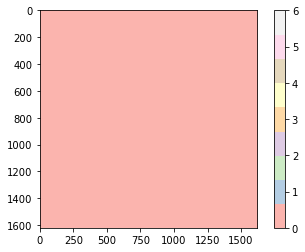

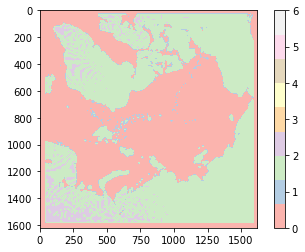

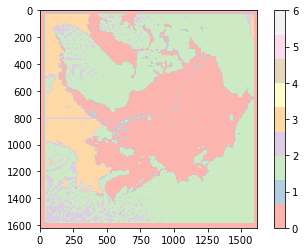

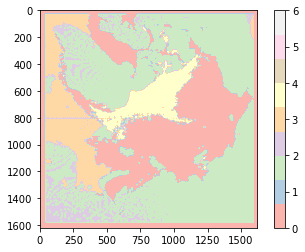

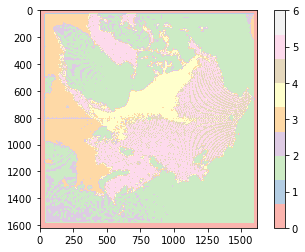

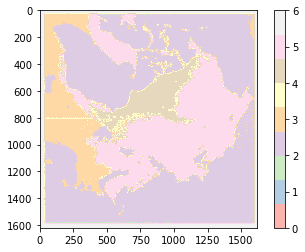

In [218]:
look[new_osi_array == 0] = 1 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 128] = 2 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 384] = 3 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 403] = 4 
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 502] = 5
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()

look[new_osi_array == 765] = 6
plt.imshow(look,cmap = plt.cm.Pastel1,vmin=0,vmax = 6)
plt.colorbar()
plt.show()


In [3]:
def normalize(input_image, input_mask):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1
    return input_image, input_mask

In [4]:
@tf.function
def load_image_train(datapoint):
    input_image = tf.image.resize(datapoint['image'], (1620, 1620))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (1620, 1620))
    if tf.random.uniform(()) > 0.5:
        input_image = tf.image.flip_left_right(input_image)
        input_mask = tf.image.flip_left_right(input_mask)
    input_image, input_mask = normalize(input_image, input_mask)

    return input_image, input_mask

In [5]:
TRAIN_LENGTH = image_count
BATCH_SIZE = 2
BUFFER_SIZE = 2
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

NameError: name 'image_count' is not defined

In [10]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(load_and_preprocess_image(display_list[i]))
        plt.axis('off')
    plt.show()

InvalidArgumentError: Expected image (JPEG, PNG, or GIF), got unknown format starting with '\223NUMPY\001\000v\000{\'desc' [Op:DecodeJpeg]

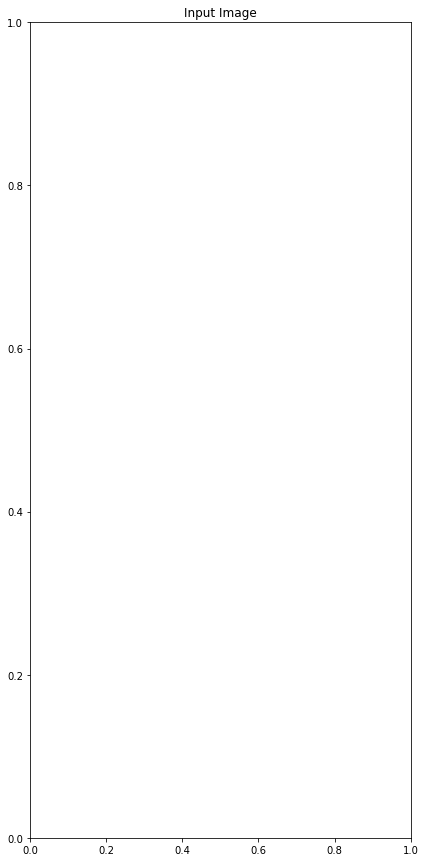

In [12]:
sample_image, sample_mask = training_path[0]
display([sample_image, sample_mask])

In [12]:
OUTPUT_CHANNELS = 3

In [13]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[1620, 1620, 3], include_top=False)

# 使用这些层的激活设置
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

# START

In [1]:
from IPython.display import clear_output
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset
from skimage import exposure
from matplotlib.patches import Polygon
from RSData import *
from HaiYangData import *
from tensorflow_examples.models.pix2pix import pix2pix

import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import glob
import cv2
import io
import shapefile
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

In [2]:
train_dir = r'E:\python_workfile\sea_ice_classification\training1'

sigmod0_npy_dir = glob.glob(train_dir + r'\sigmod0\npy\*.npy')
aari_npy_dir = glob.glob(train_dir + r'\mask\aari\npy\*.npy')



sigmod0_img_dir = train_dir + r'\\sigmod0\\small_size\\'
aari_img_dir = train_dir + r'\\mask\\aari\\small_size\\'
# aari_img_dir = train_dir + r'\\mask\\npy\\test\\'

# sigmod0_img_dir = train_dir + r'\\sigmod0\\'
# aari_img_dir = train_dir + r'\\mask\\'

sigmod0_img_files = glob.glob(sigmod0_img_dir + '*.png')
aari_img_files = glob.glob(aari_img_dir + '*.png')


In [3]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [4]:
import random
import glob


image_paths = sigmod0_img_files
mask_paths = aari_img_files
training_path = [[image,mask]for image,mask in zip(image_paths,mask_paths)]
random.shuffle(training_path)
image_count = len(training_path)
path_slice = int(2*(image_count/3))

In [5]:
train_path = training_path[:path_slice]
test_path = training_path[path_slice:]

In [6]:
def getBinaryTensor(imgTensor, boundary = 220): 
    one = tf.ones_like(imgTensor) 
    zero = tf.zeros_like(imgTensor) 
    return tf.where(imgTensor > boundary, one, zero)

In [7]:
def preprocess_mask(mask):
    mask_arr = np.array(mask)
    
#     mask_arr[mask_arr == 254] = 0
#     mask_arr[mask_arr == 75] = 1
#     mask_arr[mask_arr == 178] = 2
#     mask_arr[mask_arr == 78] = 3
#     mask_arr[mask_arr == 169] = 4
#     mask_arr[mask_arr == 92] = 5
#     mask_arr[mask_arr == 0] = 6
#     mask_arr[mask_arr >6] = 0
    
    return mask_arr

In [8]:
def split_train_paths(paths):
    train_img_paths = [path[0] for path in paths]
    train_mask_paths = [path[1] for path in paths]
    return train_img_paths, train_mask_paths

def load_and_preprocess_image(path):
    image = tf.io.read_file(path)
    return preprocess_image(image)

def preprocess_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize(image, [128, 128])
#   image = tf.image.resize(image, [1565, 1565])
  image /= 255.0  # normalize to [0,1] range

  return image

def load_and_preprocess_mask(path):
    mask = tf.io.read_file(path)
#     mask = np.array(mask)
    mask = tf.image.decode_jpeg(mask, channels=1)
    
    mask = tf.image.resize(mask, [128, 128])
#     mask_arr = np.array(mask)
#     mask -= 220.0
#     mask /= 10
#     mask_arr[mask_arr == 254] = 0
#     mask_arr[mask_arr == 75] = 1
#     mask_arr[mask_arr == 178] = 2
#     mask_arr[mask_arr == 78] = 3
#     mask_arr[mask_arr == 169] = 4
#     mask_arr[mask_arr == 92] = 5
#     mask_arr[mask_arr == 0] = 6
#     mask_arr[mask_arr >6] = 0

#     index = tf.where(mask == 254)
#     mask[index].assgin(0)
    
    return mask
#     return mask



In [9]:
train_image_paths, train_mask_paths = split_train_paths(train_path)
test_image_paths, test_mask_paths = split_train_paths(test_path)


In [10]:
train_img_path_ds = tf.data.Dataset.from_tensor_slices(train_image_paths)
train_mask_path_ds = tf.data.Dataset.from_tensor_slices(train_mask_paths)

test_img_path_ds = tf.data.Dataset.from_tensor_slices(test_image_paths)
test_mask_path_ds = tf.data.Dataset.from_tensor_slices(test_mask_paths)

In [11]:
test_mask_paths = [r'E:\python_workfile\sea_ice_classification\training1\mask\npy\test\c.png']

In [12]:
train_image_ds = train_img_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
train_mask_ds = train_mask_path_ds.map(load_and_preprocess_mask, num_parallel_calls=AUTOTUNE)

test_image_ds = test_img_path_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
test_mask_ds = test_mask_path_ds.map(load_and_preprocess_mask, num_parallel_calls=AUTOTUNE)

In [13]:
train = tf.data.Dataset.zip((train_image_ds,train_mask_ds))
test = tf.data.Dataset.zip((test_image_ds,test_mask_ds))

In [14]:
TRAIN_LENGTH = image_count
BATCH_SIZE = 32
BUFFER_SIZE = 1000
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE

In [15]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

In [16]:
train_dataset

<PrefetchDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>

In [17]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ['Input Image', 'True Mask', 'Predicted Mask']

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.preprocessing.image.array_to_img(display_list[i]),vmin=0,cmap = plt.cm.jet)
#         cb = plt.colorbar()
        plt.axis('off')
    plt.show()

pic_dir = r'E:/python_workfile/sea_ice_classification/1.npy'
pic = np.load(pic_dir)
plt.figure(figsize=(15, 15))
plt.imshow(pic,vmin=0,cmap = plt.cm.jet)
plt.colorbar()
# plt.legend()
plt.axis('off')

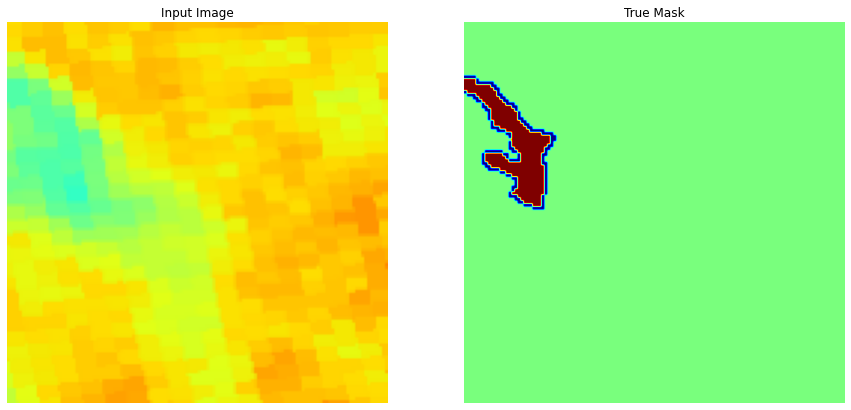

In [18]:
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
display([sample_image, sample_mask])

In [19]:
a = np.array(sample_mask)


In [20]:
OUTPUT_CHANNELS = 7

In [21]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128,128 , 3], include_top=False)

# 使用这些层的激活设置
layer_names = [
    'block_1_expand_relu',   # 64x64
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
layers = [base_model.get_layer(name).output for name in layer_names]

# 创建特征提取模型
down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

In [22]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [23]:
def unet_model(output_channels):
    inputs = tf.keras.layers.Input(shape=[128,128 , 3])
    x = inputs

    # 在模型中降频取样
    skips = down_stack(x)
    x = skips[-1]
    skips = reversed(skips[:-1])

    # 升频取样然后建立跳跃连接
    for up, skip in zip(up_stack, skips):
        x = up(x)
        concat = tf.keras.layers.Concatenate()
        x = concat([x, skip])

    # 这是模型的最后一层
    last = tf.keras.layers.Conv2DTranspose(
        output_channels, 3, strides=2,
        padding='same')  #64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [24]:
model = unet_model(OUTPUT_CHANNELS)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

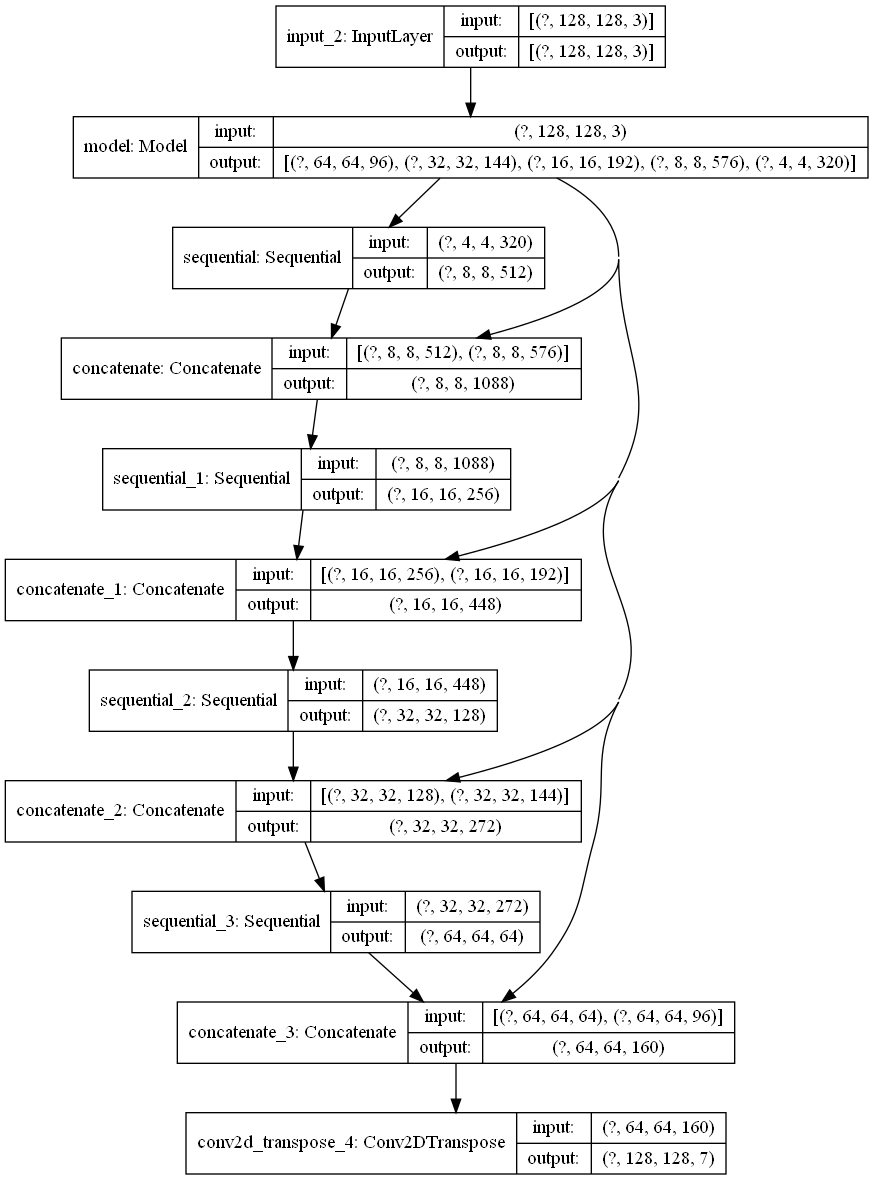

In [25]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [26]:
def create_mask(pred_mask):
    pred_mask = tf.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask[0]

In [27]:
def show_predictions(dataset=None, num=1):
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display([image[0], mask[0], create_mask(pred_mask)])
    else:
        display([sample_image, sample_mask,
             create_mask(model.predict(sample_image[tf.newaxis, ...]))])

In [28]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
 
config.gpu_options.per_process_gpu_memory_fraction = 0.3
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [30]:
class DisplayCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)
    show_predictions()
    print ('\nSample Prediction after epoch {}\n'.format(epoch+1))

In [31]:
EPOCHS = 130
VAL_SUBSPLITS = 5
VALIDATION_STEPS = TRAIN_LENGTH//BATCH_SIZE//VAL_SUBSPLITS



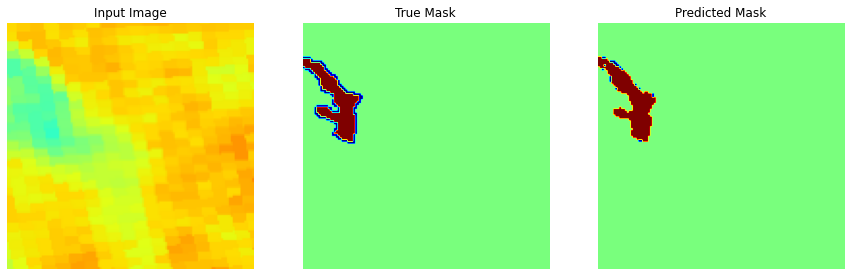


Sample Prediction after epoch 130

6/6 [==============================] - 1s 100ms/step - loss: 0.0345 - accuracy: 0.9878 - val_loss: 0.4653 - val_accuracy: 0.9084


In [32]:
model_history = model.fit(train_dataset, epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_steps=VALIDATION_STEPS,
                          validation_data=test_dataset,
                          callbacks=[DisplayCallback()])

In [34]:
len(model_history.history['val_loss'])

130

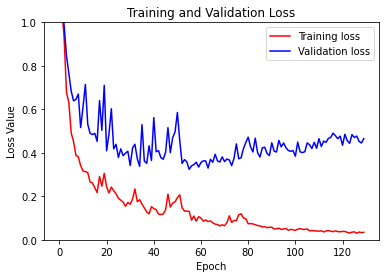

In [35]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(EPOCHS)
# epochs = range(1300)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

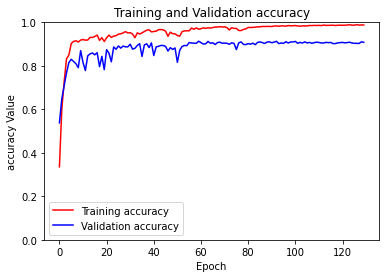

In [36]:
accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

# epochs = range(EPOCHS)
epochs = range(EPOCHS)
plt.figure()
plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy Value')
plt.ylim([0, 1])
plt.legend()
plt.show()

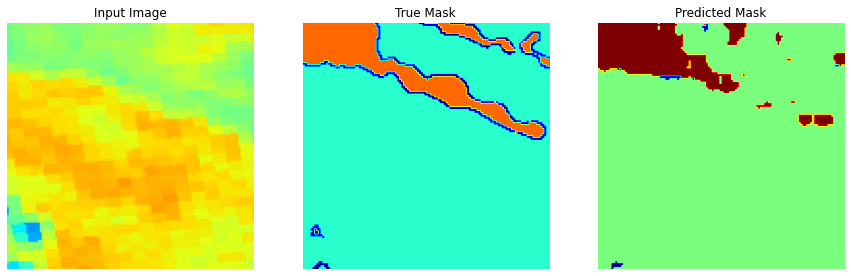

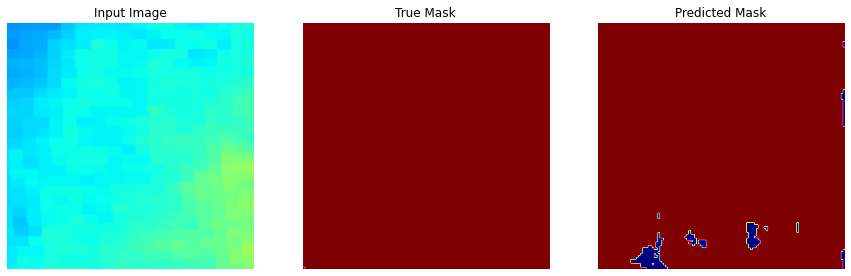

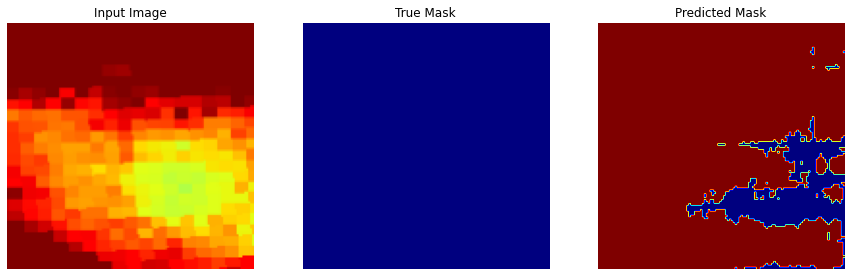

In [55]:
show_predictions(test_dataset, 10)

In [48]:
test_dataset.take(2)

<TakeDataset shapes: ((None, 128, 128, 3), (None, 128, 128, 1)), types: (tf.float32, tf.float32)>

In [49]:
for image, mask in test_dataset.take(2):
    sample_image, sample_mask = image, mask
# display([sample_image, sample_mask])

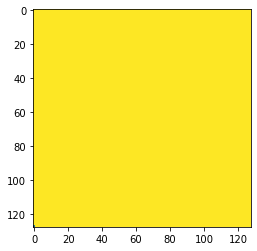

In [53]:
plt.imshow(sample_mask[0,:,:,:])
